In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
import re
pattern=''

In [6]:
def snake_case_columns(dataframe):
    
    snake_columns = list()

    for column in dataframe.columns:
        column = column.replace(' ', '_')
        column = column.lower()
        snake_columns.append(column)

    dataframe.columns = snake_columns

    return dataframe

customer_df = snake_case_columns(customer_df)

In [7]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [9]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
categoricals=customer_df.select_dtypes(include=np.object)
numericals=customer_df.select_dtypes(include=np.number)

<ipython-input-10-20af9479c7c6>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals=customer_df.select_dtypes(include=np.object)


In [11]:
continuous=[]
discrete=[]
for i in numericals.columns:
    if len(customer_df[i].unique())>20:
        continuous.append(i)
    else:
        discrete.append(i)

In [12]:
continuous_df=pd.DataFrame(customer_df[continuous],columns=continuous)
discrete_df=pd.DataFrame(customer_df[discrete],columns=discrete)

In [13]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [14]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [15]:
corr_disc=discrete_df.corr()
corr_cont=continuous_df.corr()

<AxesSubplot:>

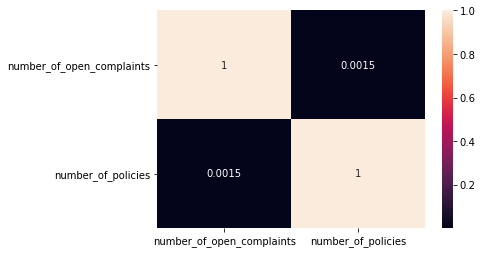

In [16]:
sns.heatmap(corr_disc,annot=True)

<AxesSubplot:>

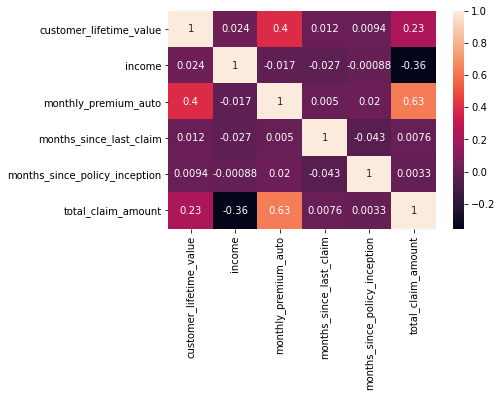

In [17]:
sns.heatmap(corr_cont,annot=True)

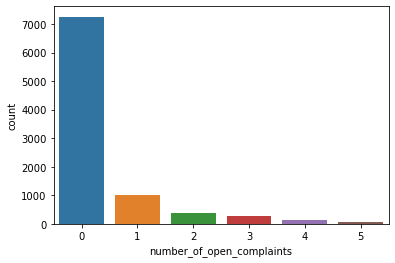

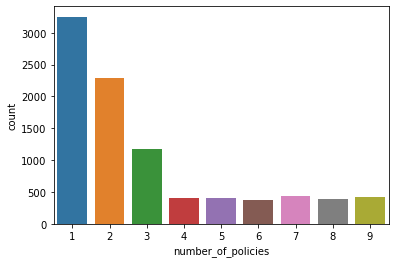

In [18]:
def plot_disc(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None

plot_disc(discrete_df)

In [19]:
#we can see that for the number of complains, the vast majority of values is 0

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


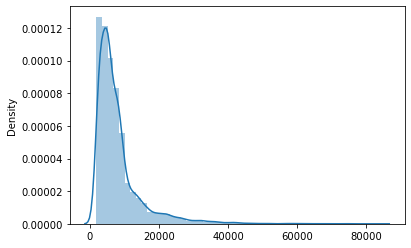

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


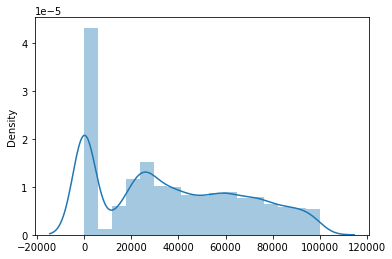

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


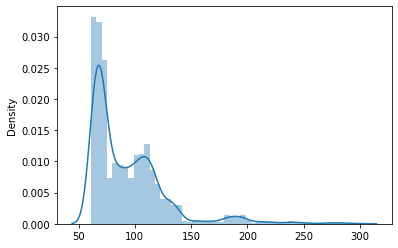

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


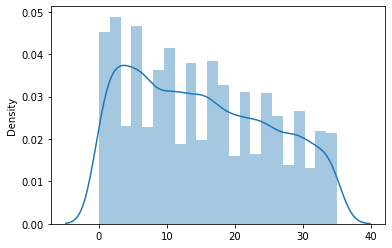

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


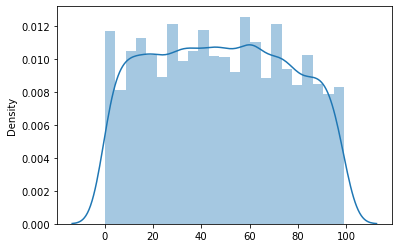

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


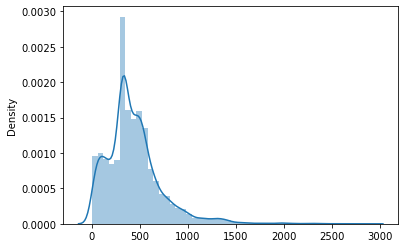

In [20]:
def plot_cont(Dataframe):
    for column in Dataframe.columns:
        sns.distplot(x=Dataframe[column])
        plt.show()
    return None
   

plot_cont(continuous_df)

In [21]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [22]:
def log_tran(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [23]:
for column in continuous_df:
    continuous_df[column]=continuous_df[column].apply(log_tran)

In [24]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,6.339428
3,8.941920,NaN,4.663439,2.890372,4.174387,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,4.928202


In [25]:
continuous_df.shape

(9134, 6)

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


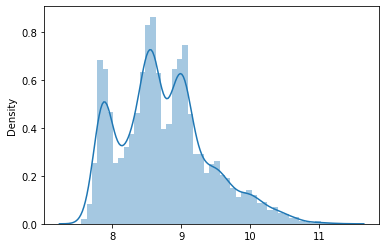

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


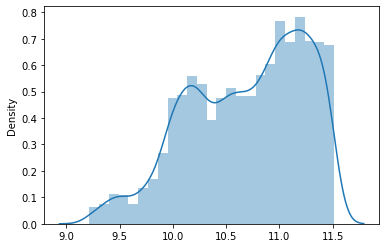

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


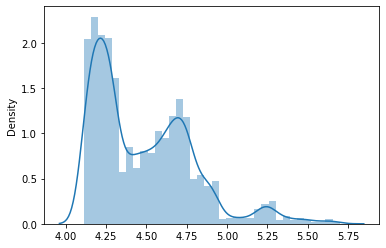

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


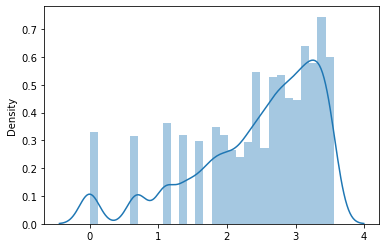

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


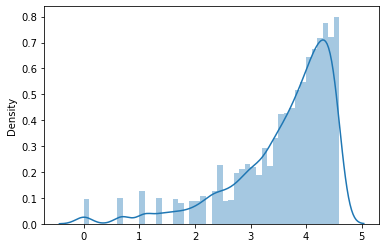

C:\Users\inesr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


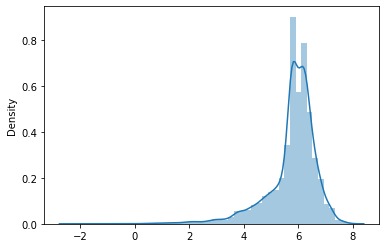

In [26]:
plot_cont(continuous_df)

In [27]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
lower_limit = np.percentile(continuous_df['total_claim_amount'],25) - 1.5*iqr
print(lower_limit)

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] < lower_limit]
len(extraordinary_points)

4.558793261718426


844

In [28]:
#i wanted to check the outliers in the total claim amount, cause it seemed the most queued, but it has too many 'outliers', to erase them.

In [29]:
categoricals.shape

(9134, 15)

In [30]:
discrete_df=discrete_df.astype('object')

In [31]:
#categoricals=pd.concat([categoricals,discrete_df],axis=1)

In [32]:
#categoricals.head()

In [33]:
categoricals['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [34]:
name=categoricals['policy'][0].split()
name[0]

'Corporate'

In [35]:
def number_policy(x):
    name= x.split()
    return name[1]
    

In [36]:
def cat_policy(x):
    name= x.split()
    return name[0]
    

In [37]:
categoricals['policy_num']=list(map(number_policy,categoricals['policy']))
categoricals['policy_cat']=list(map(cat_policy,categoricals['policy']))

<ipython-input-37-83f74f60ae39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['policy_num']=list(map(number_policy,categoricals['policy']))
<ipython-input-37-83f74f60ae39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['policy_cat']=list(map(cat_policy,categoricals['policy']))


In [38]:
categoricals=categoricals.drop(['policy'],axis=1)

In [39]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_num,policy_cat
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,L3,Corporate
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,L3,Personal
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,L3,Personal
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,L2,Corporate
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,L1,Personal


In [109]:
#drop it, it doesn't give us any information

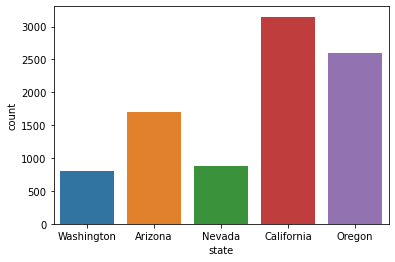

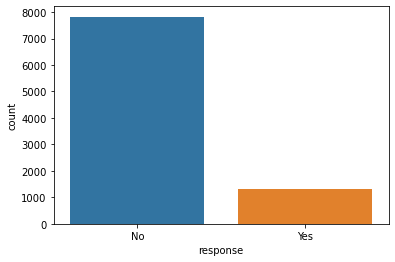

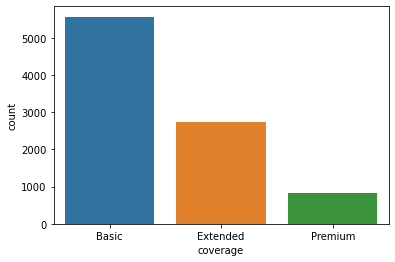

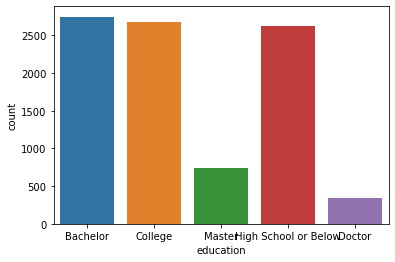

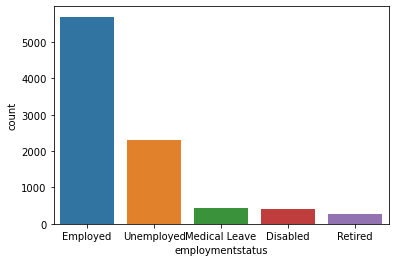

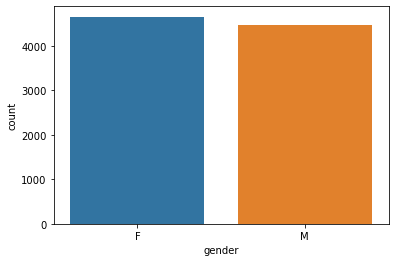

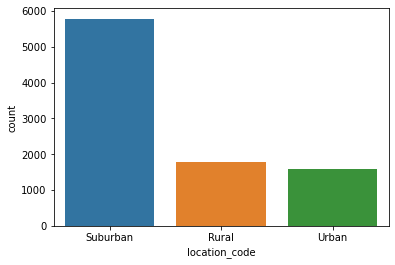

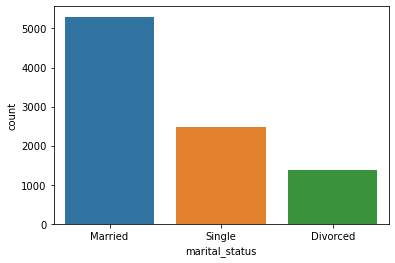

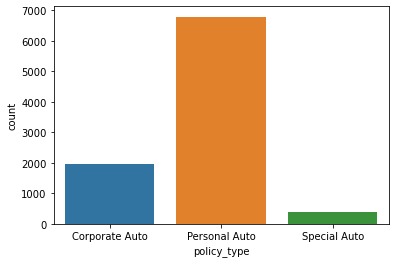

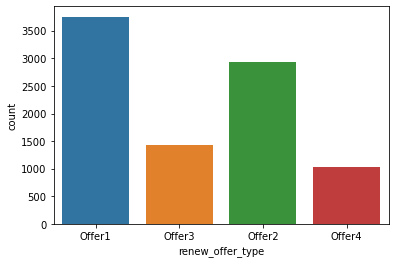

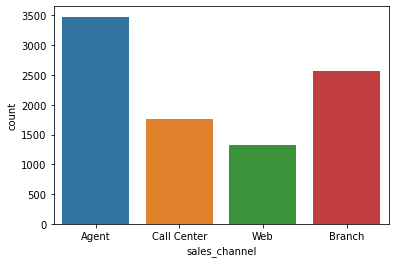

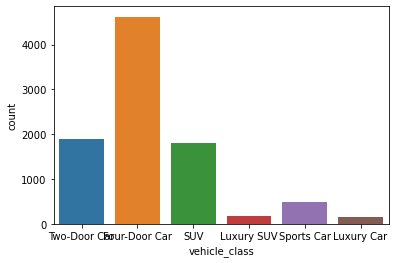

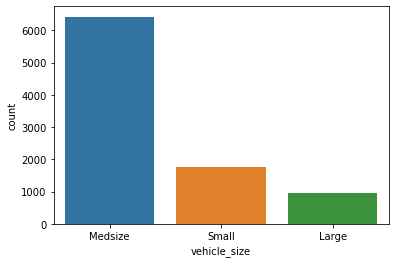

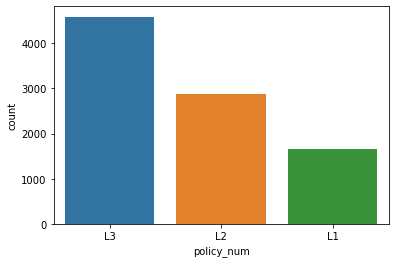

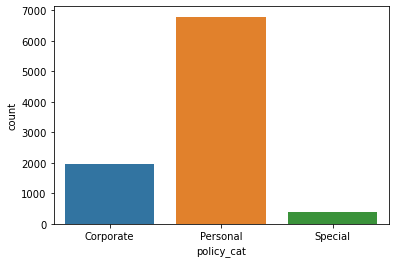

In [40]:
def barplot(Dataframe):
    for column in Dataframe.columns:
        if column == 'customer':
            pass 
        else:
            sns.countplot(x=Dataframe[column])
            plt.show()    
    return None

barplot(categoricals)

In [45]:
categoricals['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [ ]:
# so in the vehicle class i can see there's two categories refering to luxury and they don't have too many values in them, so i'm gonna put them together.

In [46]:
def luxury(x):
    if 'Luxury' in x:
        return 'Luxury'
    else:
        return x
    
categoricals['vehicle_class']=categoricals['vehicle_class'].apply(luxury)

In [47]:
categoricals['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury            347
Name: vehicle_class, dtype: int64

In [ ]:
#the employmentstatus, theres 3 categories that comparing the to the other 2, have very little values, so i'm gonna put them together in

In [51]:
def other(x):
    if x in ['Employed', 'Unemployed']:
        return x
    else:
        return 'other'
    
categoricals['employmentstatus']=categoricals['employmentstatus'].apply(other)

In [52]:
categoricals['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [48]:
categoricals['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [49]:
categoricals['policy_cat'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy_cat, dtype: int64

In [ ]:
# and the policy_tpe column is actually exatcly the same as the one i created from policy, so i'm gonn drop it

In [50]:
categoricals=categoricals.drop(['policy_cat'],axis=1)

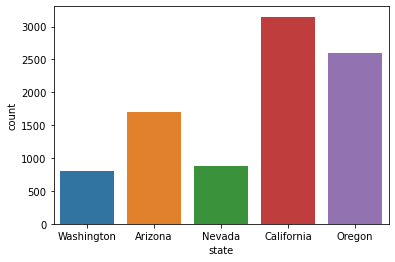

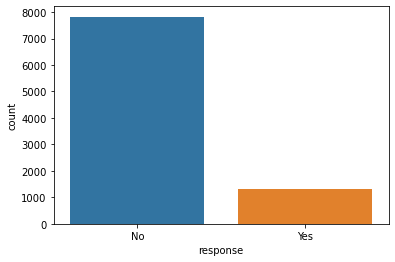

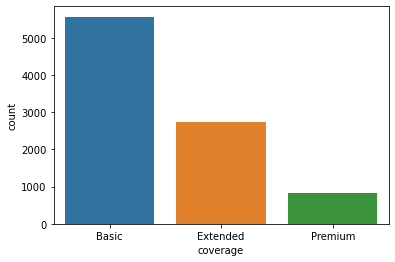

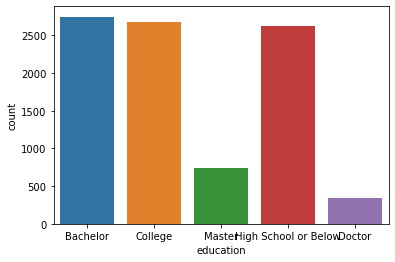

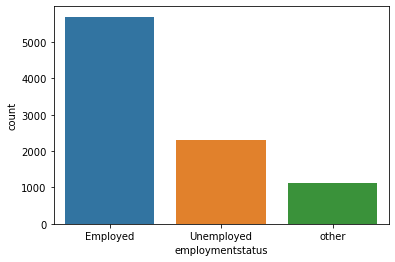

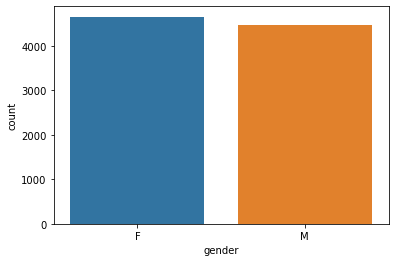

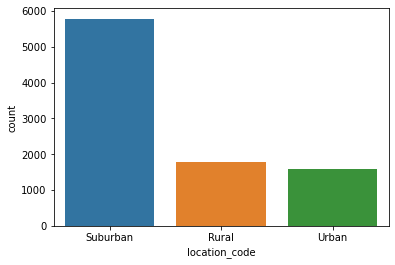

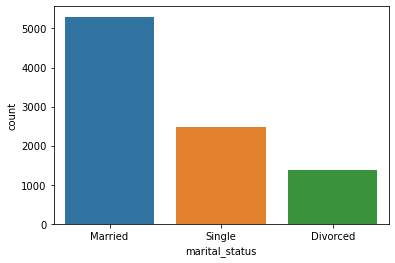

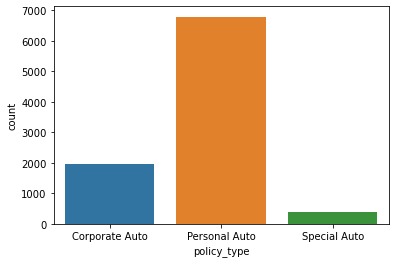

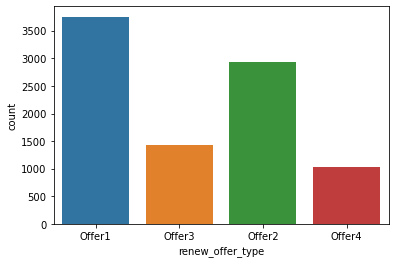

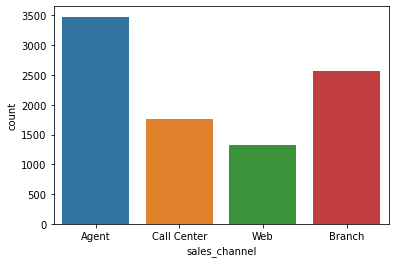

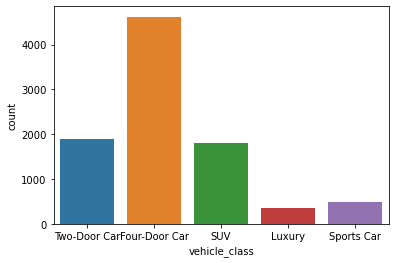

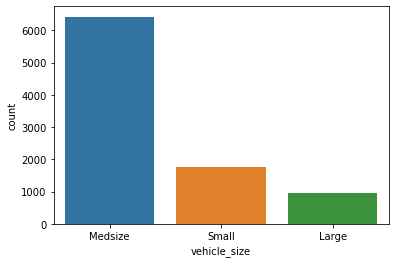

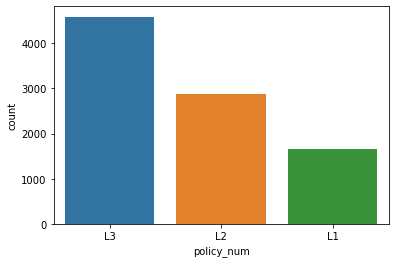

In [53]:
barplot(categoricals)

In [54]:
customer_df['effective_to_date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

In [59]:
customer_df['day']=customer_df['effective_to_date'].dt.day
customer_df['month']=customer_df['effective_to_date'].dt.month
customer_df['year']=customer_df['effective_to_date'].dt.year

In [60]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011


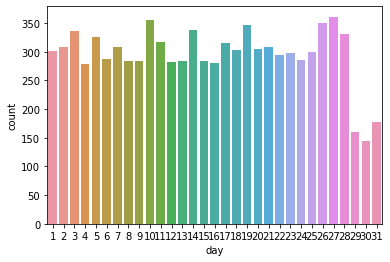

In [61]:
sns.countplot(x=customer_df['day'])
plt.show()

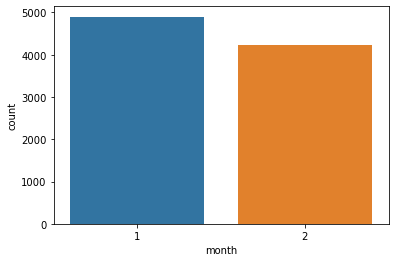

In [62]:
sns.countplot(x=customer_df['month'])
plt.show()

In [63]:
# month one is January month 2 is February

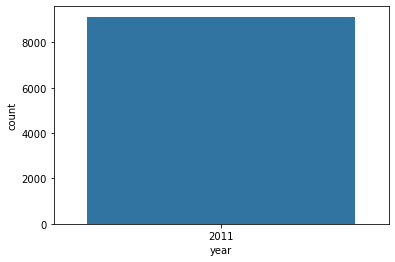

In [64]:
sns.countplot(x=customer_df['year'])
plt.show()

In [65]:
#we only have year 2011
#i'm gonna drop the year column and the effective_to_date column

In [66]:
customer_df=customer_df.drop(['year', 'effective_to_date'],axis=1)